In [1]:
import pandas as pd
import numpy as np
from isochrones import StarModel
from isochrones.mist import MIST_Isochrone

Earthradius = 6371000
Sunradius = 695508000
G = 6.67e-11
Msun = 1.989e30 ## kg


In /Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/anasofiauzsoy/anaconda/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/anasofiauzsoy/anaconda

In [2]:
df = pd.read_csv("isochrones_input.csv")
df

,kepid,koi,per,adivr,delta,derror,host_radius,numstars,logg,logg_errup,...,parallax,parallax_error,kepmag,jmag,hmag,kmag,gmag,rmag,imag,zmag
0,2718885,0,0.197333,3.43,96.0,14.0,1.417,80048.853918,4.113,0.048,...,0.821435,0.024400,14.659,13.349,12.990,12.936,15.231,14.607,14.414,14.325
1,3112129,4144,0.487657,3.67,107.0,6.0,0.972,51999.969769,4.390,0.070,...,1.158976,0.019811,14.374,13.313,13.000,12.968,14.833,14.326,14.177,14.123
2,4665571,2393,0.766690,5.28,259.0,13.0,0.727,75349.448996,4.590,0.030,...,1.970339,0.032467,14.903,13.310,12.836,12.721,15.695,14.841,14.564,14.376
3,8435766,0,0.355008,3.37,229.0,1.0,0.744,80990.789899,4.572,0.026,...,8.011261,0.021162,11.551,10.183,9.675,9.586,12.182,11.460,11.281,11.129
4,9642018,4430,0.252556,3.74,223.0,23.0,0.799,85224.549375,4.550,0.040,...,1.121816,0.027226,15.544,14.188,13.679,13.635,16.215,15.471,15.256,15.115
5,11187332,0,0.305984,5.42,126.0,13.0,0.950,68671.589240,4.428,0.046,...,0.952919,0.025964,15.168,13.954,13.590,13.480,15.684,15.102,14.947,14.878
6,11550689,0,0.301601,2.55,412.0,6.0,0.647,90699.214979,4.617,0.033,...,3.748304,0.019373,14.604,12.631,11.976,11.804,15.875,14.604,14.060,13.803
7,1717722,3145,0.977308,5.22,266.0,21.0,0.656,68161.223477,4.629,0.022,...,1.659280,0.034851,15.689,14.057,13.460,13.358,16.554,15.617,15.319,15.128
8,3444588,1202,0.928311,5.70,397.0,21.0,0.652,83766.208595,4.624,0.025,...,1.957913,0.036163,15.854,13.936,13.305,13.105,17.024,15.839,15.352,15.057
9,4055304,2119,0.571039,3.98,243.0,5.0,0.792,79809.643207,4.540,0.040,...,2.303474,0.022842,14.098,12.682,12.240,12.151,14.796,14.022,13.799,13.669


Now, for the isochrones fitting.

In [3]:
def higher_error(errup, errdown):
    if abs(errdown) > errup:
        return errdown
    return errup

In [4]:
bands = ['J','H','K','Kepler','g','r','i','z']
mist = MIST_Isochrone(bands = ['K'])
star_radii = []
star_rad_sigma = []
star_rad_array = []
star_masses = []
star_mass_sigma = []
deltaarray = []
fifteen = []
eightyfive = []
num_samples = 1000
planet_radii_samples = []
planet_a_samples = []

for index, row in df.iterrows():
    radiisamples = []
    asamples= []
    mags = {'K':(row['kmag'],0.05)}
    model = StarModel(mist, logg = (row['logg'],higher_error(row['logg_errup'], row['logg_errdown'])), 
                      teff = (row['teff'],higher_error(row['teff_errup'], row['teff_errdown'])),
                      feh = (row['feh'],higher_error(row['feh_errup'], row['feh_errdown'])), 
                      parallax = (row['parallax'],row['parallax_error']), **mags)

    StarModel.fit_multinest(model,n_live_points=1000, basename=None, verbose=False, refit=True, overwrite=True,test=False)
    star_radii.append(model.samples.radius_0_0.quantile(0.5))
    star_masses.append(model.samples.mass_0_0.quantile(0.5))
    star_rad_sigma.append(np.std(model.samples.radius_0_0))
    star_mass_sigma.append(np.std(model.samples.mass_0_0))
    fifteen.append(np.percentile(model.samples.radius_0_0, 15.85))
    eightyfive.append(np.percentile(model.samples.radius_0_0, 84.15))
    star_rad_array = np.random.choice(model.samples.radius_0_0, num_samples) ## star radii
    star_mass_array = np.random.choice(model.samples.mass_0_0, num_samples) ## star masses
    deltaarray = np.random.normal(row['delta'],row['derror'], num_samples)
    for j in range(len(star_rad_array)):
        if deltaarray[j] > 0:
            radiisamples.append((star_rad_array[j]*Sunradius*np.sqrt(deltaarray[j]/1000000))/Earthradius)
        else:
            radiisamples.append(np.nan)
    planet_radii_samples.append(radiisamples)
    period = row['per'] * 24 * 3600
    for mass_index, mass in enumerate(star_mass_array):
        asamples.append(((((G * mass * Msun) / (4 * np.pi * np.pi)) * period * period)**(1/3)) * 1e-3)
    planet_a_samples.append(asamples)
    print(index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


In [5]:
# for i in range(0, len(df)):
#     radiisamples = []
#     asamples= []
#     mags = {'K':(df.kmag.values[i],0.05)}
#     model = StarModel(mist, logg = (df.logg.values[i],df.logg_errup.values[i]), 
#                       teff = (df.teff.values[i], df.teff_errup.values[i]),
#                       feh = (df.feh.values[i],df.feh_errup.values[i]), 
#                       parallax = (df.parallax.values[i],df.parallax_error.values[i]), **mags)

#     StarModel.fit_multinest(model,n_live_points=1000, basename=None, verbose=False, refit=True, overwrite=True,test=False)
#     star_radii.append(model.samples.radius_0_0.quantile(0.5))
#     star_masses.append(model.samples.mass_0_0.quantile(0.5))
#     star_rad_sigma.append(np.std(model.samples.radius_0_0))
#     star_mass_sigma.append(np.std(model.samples.mass_0_0))
#     fifteen.append(np.percentile(model.samples.radius_0_0, 15.85))
#     eightyfive.append(np.percentile(model.samples.radius_0_0, 84.15))
#     star_rad_array = np.random.choice(model.samples.radius_0_0, num_samples) ## star radii
#     star_mass_array = np.random.choice(model.samples.mass_0_0, num_samples) ## star masses
#     deltaarray = np.random.normal(df.delta.values[i],df.derror.values[i], num_samples)
#     for j in range(len(star_rad_array)):
#         if deltaarray[j] > 0:
#             radiisamples.append((star_rad_array[j]*Sunradius*np.sqrt(deltaarray[j]/1000000))/Earthradius)
#         else:
#             radiisamples.append(np.nan)
#     planet_radii_samples.append(radiisamples)
#     period = df.per.values[i] * 24 * 3600
#     for index, mass in enumerate(star_mass_array):
#         asamples.append(((((G * mass * Msun) / (4 * np.pi * np.pi)) * period * period)**(1/3)) * 1e-3)
#     planet_a_samples.append(asamples)
#     print(i)

In [6]:
np.savetxt("planet_radius_samples111820.txt", planet_radii_samples)

In [7]:
short_period_samples = [planet_radii_samples[i] for i in range(len(df)) if df.per.values[i] < 10/24]

In [8]:
np.shape(short_period_samples)

(7, 1000)

In [9]:
short_per_per_days = np.array([i * np.ones(1000) for i in df.per.values if i * 24 < 10.]).flatten()
short_per_cmf = 0.33 * np.ones_like(short_per_per_days)

In [10]:
np.savetxt("short_per_interp_inputs111820.txt", [np.array(short_period_samples).flatten(), short_per_per_days, short_per_cmf],
          header = "radius sample, per (days), CMF")

In [12]:
raderrup = [value - median for value, median in zip(eightyfive, star_radii)]
raderrdown = [median - value for value, median in zip(fifteen, star_radii)]

In [13]:
np.savetxt("stellar_radii.txt", (star_radii, raderrup, raderrdown, star_rad_sigma), header = "median radius, errup, errdown, stdev")

In [70]:
np.savetxt("stellar_masses112520.txt", [star_masses, star_mass_sigma])

In [14]:
len(star_radii)

58

In [17]:
import csv

CKSkoi = []
CKSstarrad = []
CKSerr_up = []
CKSerr_down = []

with open('UpdateFultonPetigura18.csv') as File:
    reader = csv.reader(File, delimiter=',')
    for row in reader:
        r = int(row[0][2:])
        if (r in df.koi.values):
            CKSkoi.append(r)
            CKSstarrad.append(float(row[11]))
            CKSerr_up.append(float(row[12]))
            CKSerr_down.append(float(row[13]))

In [19]:
compare_star_radii = np.zeros(len(CKSkoi))
compare_sigmas = np.zeros(len(CKSkoi))
compare_errup = np.zeros(len(CKSkoi))
compare_errdown = np.zeros(len(CKSkoi))

for i in range(len(df)):
    for j in range(len(CKSkoi)):
        if (df.koi.values[i]) == CKSkoi[j]:
            compare_star_radii[j] = star_radii[i]
            compare_sigmas[j] = star_rad_sigma[i]
            compare_errup[j] = raderrup[i]
            compare_errdown[j] = raderrdown[i]

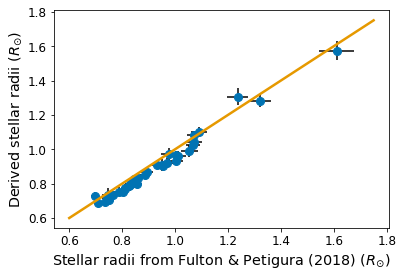

In [20]:
import matplotlib.pyplot as plt

myblue = (0, .45, .70)
mygold = (.9, .6, 0)


x = np.linspace(0.6, 1.75, 50)
plt.plot(compare_star_radii, CKSstarrad, 'o', color = myblue, markersize = 8)
plt.plot(x,x, lw = 2.5, color = mygold)
plt.errorbar(compare_star_radii, CKSstarrad, xerr = [compare_errdown, compare_errup], yerr = [CKSerr_down, CKSerr_up], ls = 'None', ecolor = 'k')
plt.ylabel('Derived stellar radii ($R_{\odot}$)', fontsize = 'x-large')
plt.xlabel('Stellar radii from Fulton & Petigura (2018) ($R_{\odot}$)', fontsize = 'x-large')
plt.xticks(fontsize = 'large')
plt.yticks(fontsize = 'large')
plt.show()

In [22]:
SO_radii = np.zeros(len(df))
SO_errup = np.zeros(len(df))
SO_errdown = np.zeros(len(df))

with open('USPCandidates.csv', encoding='latin-1') as File:
    reader = csv.reader(File, delimiter=',')
    rownum = 0
    for row in reader:
        if rownum > 0:
             if row[24] != "":
                for i in range(len(df)):
                     if int(row[0]) == df.kepid.values[i]:
                        SO_radii[i] = (float(row[9]))
                        SO_errup[i] = (float(row[10]))
                        SO_errdown[i] = (float(row[11]))
        rownum += 1

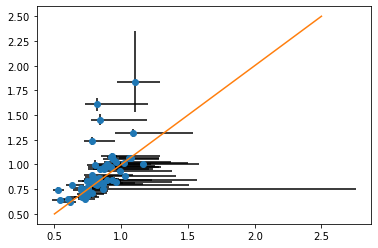

In [26]:
plt.plot(SO_radii, star_radii, 'o')
plt.errorbar(SO_radii, star_radii, yerr = [raderrdown, raderrup], xerr = [SO_errdown, SO_errup], ls = 'None', color = 'k')
y = np.linspace(0.5, 2.5, 50)
plt.plot(y,y)

need to change colors on this plot

In [ ]:
noCKSkepid = []

for i in range(len(df)):
    if df.tefferr.values[i] == 0:
        noCKSkepid.append(df.kepid.values[i])

noCKSkepidrad = [star_radii[kepid.index(i)] for i in noCKSkepid]
radiibuds = [SO_radii[kepid.index(i)] for i in noCKSkepid] ## corresponding radii

otherrad = [star_radii[kepid.index(i)] for i in kepid if i not in noCKSkepid]
radiibuds2 = [SO_radii[kepid.index(i)] for i in kepid if i not in noCKSkepid]

print(len(noCKSkepid))
print(len(otherrad))

In [27]:
berger = pd.read_csv('GKSPCPapTable2_Final.txt', delimiter = '&')

In [34]:
short_period_kepids = [df.kepid.values[i] for i in range(len(df)) if df.per.values[i] < 10/24]
short_period_masses = [star_masses[i] for i in range(len(df)) if df.per.values[i] < 10/24]

In [49]:
berger_short_masses = []

for i,j in enumerate(short_period_kepids):
    for index, row in berger.iterrows():
        if row['KIC'] == j:
            berger_short_masses.append(row['iso_mass'])
            print(row['iso_mass'])

0.9620000000000001
0.758
0.8220000000000001
0.8909999999999999
0.64
0.8390000000000001
0.7659999999999999


In [50]:
berger_short_masses

[0.9620000000000001,
 0.758,
 0.8220000000000001,
 0.8909999999999999,
 0.64,
 0.8390000000000001,
 0.7659999999999999]

Text(0, 0.5, 'My mass')

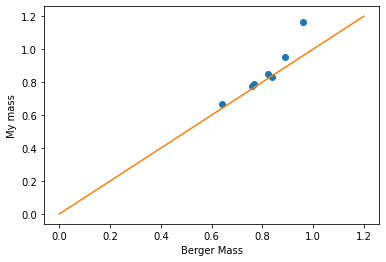

In [54]:
plt.plot(berger_short_masses, short_period_masses, 'o')
x = np.linspace(0,1.2)
plt.plot(x,x)
plt.xlabel("Berger Mass")
plt.ylabel("My mass")

In [39]:
berger.head()

,KIC,iso_mass,iso_mass_err1,iso_mass_err2,iso_teff,iso_teff_err1,iso_teff_err2,iso_logg,iso_logg_err1,iso_logg_err2,...,iso_age,unReAgeFlag,iso_age_err1,iso_age_err2,iso_dis,iso_dis_err1,iso_dis_err2,iso_avs,iso_gof,TAMS\\
0,757076,1.396,0.179,-0.218,5052.2,103.9,-86.6,3.373,0.067,-0.081,...,2.47,NaN,1.82,-0.73,651.5,22.6,-21.6,0.371,1.0,2.69\\
1,757099,0.873,0.054,-0.039,5364.9,102.7,-84.9,4.318,0.037,-0.029,...,15.20,NaN,3.00,-3.98,367.8,7.1,-6.9,0.340,1.0,17.18\\
2,757137,1.669,0.309,-0.300,4628.7,84.8,-76.2,2.388,0.083,-0.086,...,1.51,NaN,1.06,-0.58,568.4,12.2,-11.6,0.344,1.0,1.66\\
3,757280,1.715,0.086,-0.089,6856.8,144.4,-139.9,3.834,0.033,-0.032,...,1.24,NaN,0.20,-0.16,822.0,19.4,-21.0,0.496,1.0,1.62\\
4,757450,0.914,0.062,-0.057,5301.2,111.0,-103.1,4.432,0.045,-0.044,...,9.46,NaN,5.36,-5.15,829.6,24.0,-23.4,0.465,1.0,16.1\\


In [84]:
berger_rad_errup = [berger[berger.KIC == i]['iso_rad_err1'].values[0] for i in df.kepid.values]
berger_rad_errdown = [berger[berger.KIC == i]['iso_rad_err2'].values[0] for i in df.kepid.values]

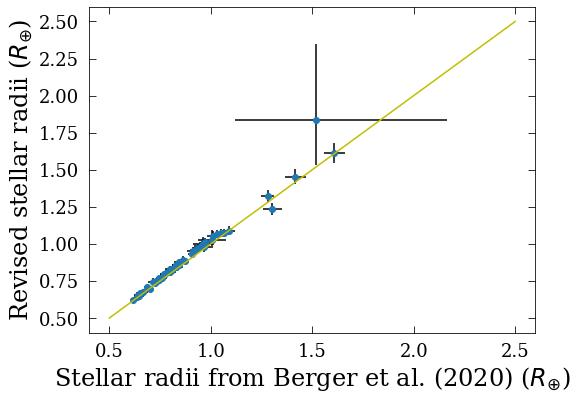

In [148]:
comp = plt.figure(figsize = (8,6))
plt.plot(df.host_radius.values, star_radii, 'o')
plt.errorbar(df.host_radius.values, star_radii, yerr = [raderrdown, raderrup], xerr = [np.abs(berger_rad_errdown), berger_rad_errup], linestyle = 'None', ecolor = 'k')
plt.plot(np.linspace(0.5,2.5), np.linspace(0.5,2.5), 'y')
plt.ylabel("Revised stellar radii ($R_{\oplus}$)")
plt.xlabel("Stellar radii from Berger et al. (2020) ($R_{\oplus}$)")
plt.show()
comp.savefig("RadiiCompare.pdf", bbox_inches = "tight")

In [92]:
np.argmax(berger_rad_errup)

29

In [74]:
berger_masses = [berger[berger.KIC == i]['iso_mass'].values[0] for i in df.kepid.values]
berger_mass_errup = [berger[berger.KIC == i]['iso_mass_err1'].values[0] for i in df.kepid.values]
berger_mass_errdown = [berger[berger.KIC == i]['iso_mass_err2'].values[0] for i in df.kepid.values]

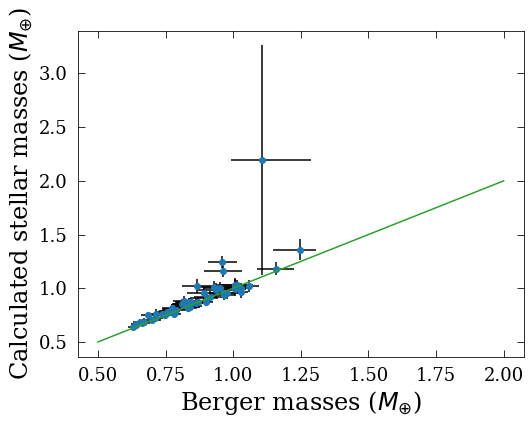

In [143]:
plt.figure(figsize = (8,6))
plt.plot(berger_masses, star_masses, 'o')
plt.errorbar(berger_masses, star_masses, yerr = star_mass_sigma, xerr = [np.abs(berger_mass_errdown), berger_mass_errup], linestyle = 'None', ecolor = 'k')
plt.plot(np.linspace(0.5,2), np.linspace(0.5,2))
plt.ylabel("Calculated stellar masses ($M_{\oplus}$)")
plt.xlabel("Berger masses ($M_{\oplus}$)")
plt.show()

In [87]:
np.argmax(star_mass_sigma)

29

In [93]:
df.columns

Index(['kepid', 'koi', 'per', 'adivr', 'delta', 'derror', 'host_radius',
       'numstars', 'logg', 'logg_errup', 'logg_errdown', 'teff', 'teff_errup',
       'teff_errdown', 'feh', 'feh_errup', 'feh_errdown', 'parallax',
       'parallax_error', 'kepmag', 'jmag', 'hmag', 'kmag', 'gmag', 'rmag',
       'imag', 'zmag'],
      dtype='object')

In [96]:
df.feh.values[29]

0.1

In [95]:
df.feh_errdown.values[29]

-0.04

Text(0, 0.5, 'Gaia Parallax error')

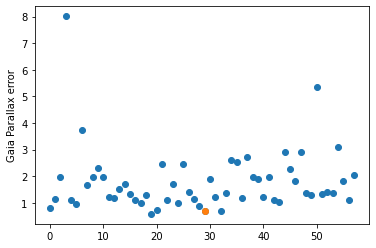

In [106]:
arr = df.parallax.values

plt.plot(arr, 'o')
plt.plot(29, arr[29], 'o')
plt.ylabel("Gaia Parallax error")

In [107]:
bands = ['J','H','K','Kepler','g','r','i','z']
mist = MIST_Isochrone(bands = ['K'])
berg_star_radii = []
berg_star_rad_sigma = []
berg_star_rad_array = []
berg_star_masses = []
berg_star_mass_sigma = []
deltaarray = []
berg_fifteen = []
berg_eightyfive = []
num_samples = 1000
berg_planet_radii_samples = []
berg_planet_a_samples = []

for index, row in df.iterrows():
    radiisamples = []
    asamples= []
    mags = {'K':(row['kmag'],0.05)}
    model = StarModel(mist, logg = (row['logg'],higher_error(row['logg_errup'], row['logg_errdown'])), 
                      teff = (row['teff'],higher_error(row['teff_errup'], row['teff_errdown'])),
                      feh = (row['feh'],0.15), 
                      parallax = (row['parallax'],row['parallax_error']), **mags)

    StarModel.fit_multinest(model,n_live_points=1000, basename=None, verbose=False, refit=True, overwrite=True,test=False)
    berg_star_radii.append(model.samples.radius_0_0.quantile(0.5))
    berg_star_masses.append(model.samples.mass_0_0.quantile(0.5))
    berg_star_rad_sigma.append(np.std(model.samples.radius_0_0))
    berg_star_mass_sigma.append(np.std(model.samples.mass_0_0))
    berg_fifteen.append(np.percentile(model.samples.radius_0_0, 15.85))
    berg_eightyfive.append(np.percentile(model.samples.radius_0_0, 84.15))
    berg_star_rad_array = np.random.choice(model.samples.radius_0_0, num_samples) ## star radii
    berg_star_mass_array = np.random.choice(model.samples.mass_0_0, num_samples) ## star masses
    deltaarray = np.random.normal(row['delta'],row['derror'], num_samples)
    for j in range(len(star_rad_array)):
        if deltaarray[j] > 0:
            radiisamples.append((star_rad_array[j]*Sunradius*np.sqrt(deltaarray[j]/1000000))/Earthradius)
        else:
            radiisamples.append(np.nan)
    berg_planet_radii_samples.append(radiisamples)
    period = row['per'] * 24 * 3600
    for mass_index, mass in enumerate(star_mass_array):
        asamples.append(((((G * mass * Msun) / (4 * np.pi * np.pi)) * period * period)**(1/3)) * 1e-3)
    berg_planet_a_samples.append(asamples)
    print(index)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57


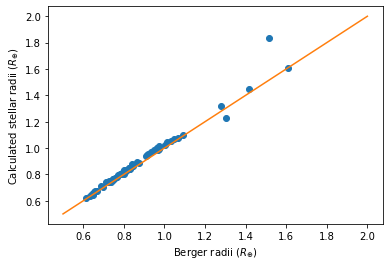

In [108]:
plt.plot(df.host_radius.values, berg_star_radii, 'o')
#plt.errorbar(df.host_radius.values, star_radii, yerr = [raderrdown, raderrup], xerr = [np.abs(berger_rad_errdown), berger_rad_errup], linestyle = 'None', ecolor = 'k')
plt.plot(np.linspace(0.5,2), np.linspace(0.5,2))
plt.ylabel("Calculated stellar radii ($R_{\oplus}$)")
plt.xlabel("Berger radii ($R_{\oplus}$)")
plt.show()

In [137]:
import matplotlib as mpl

mpl.rcParams['xtick.labelsize']    = 18.
mpl.rcParams['ytick.labelsize']    = 18.
mpl.rcParams['xtick.top']          = True
mpl.rcParams['ytick.right']        = True
mpl.rcParams['xtick.direction']    = 'in'
mpl.rcParams['ytick.direction']    = 'in'
mpl.rcParams['xtick.major.size']   = 7.
mpl.rcParams['xtick.minor.size']   = 4.
mpl.rcParams['ytick.major.size']   = 7.
mpl.rcParams['ytick.minor.size']   = 4.
mpl.rcParams['xtick.major.pad']    = 10
mpl.rcParams['ytick.major.pad']    = 10

mpl.rcParams['legend.fontsize']    = 24.
mpl.rcParams['legend.frameon']     = False

mpl.rcParams['axes.labelsize']     = 24.
mpl.rcParams['axes.titlesize']     = 24.
mpl.rcParams['axes.titlepad']      = 10

mpl.rcParams['savefig.directory']  = ''
mpl.rcParams['text.usetex']        = False
#mpl.rcParams['font.family']        = 'serif'
#mpl.rcParams['text.latex.preview'] = True

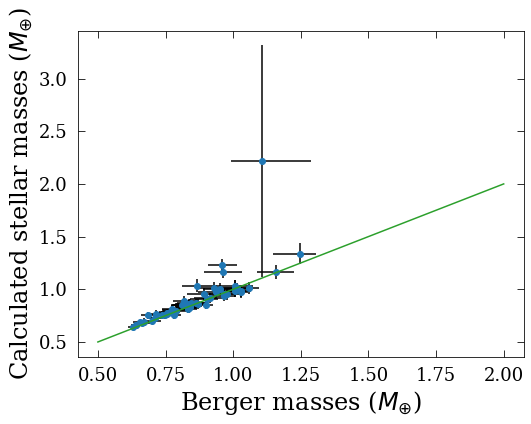

In [141]:
plt.figure(figsize = (8,6))
plt.plot(berger_masses, berg_star_masses, 'o')
plt.errorbar(berger_masses, berg_star_masses, yerr = berg_star_mass_sigma, xerr = [np.abs(berger_mass_errdown), berger_mass_errup], linestyle = 'None', ecolor = 'k')
plt.plot(np.linspace(0.5,2), np.linspace(0.5,2))
plt.ylabel("Calculated stellar masses ($M_{\oplus}$)")
plt.xlabel("Berger masses ($M_{\oplus}$)")
plt.show()

In [113]:
df.kepid[29]

8278371

In [114]:
berger[berger.KIC == 8278371]

,KIC,iso_mass,iso_mass_err1,iso_mass_err2,iso_teff,iso_teff_err1,iso_teff_err2,iso_logg,iso_logg_err1,iso_logg_err2,...,iso_age,unReAgeFlag,iso_age_err1,iso_age_err2,iso_dis,iso_dis_err1,iso_dis_err2,iso_avs,iso_gof,TAMS\\
98904,8278371,1.107,0.179,-0.116,5722.3,109.9,-106.7,4.072,0.217,-0.248,...,5.72,NaN,2.82,-2.44,767.8,323.7,-202.5,0.124,1.0,7.26\\


In [116]:
df[df.kepid == 8278371]

,kepid,koi,per,adivr,delta,derror,host_radius,numstars,logg,logg_errup,...,parallax,parallax_error,kepmag,jmag,hmag,kmag,gmag,rmag,imag,zmag
29,8278371,1150,0.677376,2.71,71.0,2.0,1.516,47443.261877,4.32,0.09,...,0.681192,0.327985,13.326,12.214,11.891,11.823,13.765,13.294,13.139,13.07


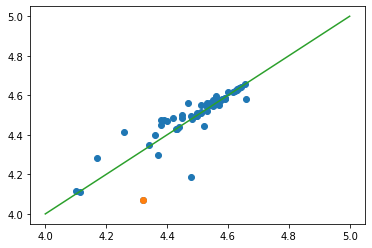

In [119]:
l = [berger[berger.KIC == i]['iso_logg'].values[0] for i in df.kepid.values]
plt.plot(df.logg.values, l, 'o')
plt.plot(df.logg.values[29], l[29], 'o')
plt.plot(np.linspace(4,5), np.linspace(4,5))

In [120]:
df[df.kepid == 8895758]

,kepid,koi,per,adivr,delta,derror,host_radius,numstars,logg,logg_errup,...,parallax,parallax_error,kepmag,jmag,hmag,kmag,gmag,rmag,imag,zmag


In [ ]:
g = plt.figure()
plt.loglog(per2,meanearthradii, 'o', basex = (6**0.25), basey = np.sqrt(2), color = myblue)
plt.errorbar(per2,meanearthradii, yerr = [down, up], linestyle = 'None', ecolor = 'k')
plt.yticks(radbins, [0.5,0.707,1,1.414,2,2.83,4], fontsize = 'large')
plt.xticks(perbins,[4,6.3,9.8,15.3,24], fontsize = 'large')
plt.xlabel("Orbital Period (hours)", fontsize = 'x-large')
plt.ylabel("Planet Radius ($R_{ \oplus}$)", fontsize = 'x-large')
##plt.title("Planet Radius vs. Orbital Period")
g.savefig("PosterFig2.pdf", bbox_inches = "tight")
plt.show()